# COG 108 - Final Project

# Overview

In this project we cleaned up, visualized, and interpreted a dataset related to suicide rate across the world from 1985 to 2016.

Made visualizations and comparisons on general applicable traits such as age and gender.

Hypothesized on the correlation between suicide rate and GDP across the world and fit the data to a linear regression model.

Analyzed graphs and regression results to reach an interesting conclusion in regards to our hypothesis.

# Names

- Michael Bui
- Bodong Wang
- Muyuan Chi
- Jin Zhou

# Group Member IDs

- A14155418
- A92090557
- A13371247
- A13351919

# Introduction and Background

Suicide is an important mental health issue in the U.S. and beyond. As college students, we all know how difficult school can be with the amount of stress, anxiety, and expectations that pile up that could push an individual to such extremes, but despite that we barely know any concrete statistics pertaining to this topic. We want to expand our knowledge on this topic and understand its possible relation to socioeconomic status.

Upon further research in our topic we found multiple projects that wanted to find out questions similar to ours that came up with similar results with one another. For example, one study had been done on data from 1 million individuals in South Korea from 2003 and 2013 regarding the relationship between the individual’s socioeconomic position and suicide risk to which they found that the ratios of suicide increased as the socioeconomic position decreased. Another study used data collected from 25 European Union countries from roughly 2003 to 2005 in hopes to assess the relationship between suicide rates and socioeconomic characteristics at a larger scale across Europe, concluding that ecological associations to suicide are not due to the particular area, but rather on a grander scale: the social, economic, and political features of the countries.

With the information we gathered, we hope to find results similar to our predecessors, but instead we will attempt to find out which particular features of socioeconomic status affect suicide rates more since it is a broad term. In doing so, we wish to provide adequate analyses that connect the socioeconomic feature to a greater risk of suicide.

References:
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5463019/
- https://www.sciencedirect.com/science/article/pii/S1344622309000236

# Research Question

We seek to use and analyze our dataset to determine which features of socioeconomic status affect global suicide rates the most from 1985 to 2016. We will be examining the GDP and HDI of the country along with the suicide population for that country. By comparing these two from 1985 to 2016, we will see whether GDP or HDI affects suicide rates more. We will do this by comparing all suicides in a given year for males and females of a country and comparing them to see if there is a trend. For our dataset, GDP stands for Gross Domestic Product and HDI means Human Development Index. We’re using GDP as our economic factor in determining suicide rates while HDI is used as the health/social factor. To measure "suicide rate", we will use the term "suicide no. per 100k population" and based on different factors, the "suicide rate" might be on country-level, gender-level and age-level. We will mainly focus on country-level since we want to have a deep understanding of the relationship between HDI, GDP and suicide rate, which are usually measured on a country-level.

# Hypothesis

We predict that GDP of the country would show a great correlation of suicide rates of people in the country. We believe this because of how deeply economic factors play into how an individual lives their life and whether or not they would commit suicide.

We assume that individuals are less likely to commit suicide if their country’s GDP is good to perpetuate a stable economy. Mainly because given the state of the economy and how well money is distributed between people they would be put in less favorable situations that would make them commit suicide.

We will hypothesis test the assumption that suicide rate is correlated with GDP with a significance level of 0.05

# Dataset(s)

- Dataset Name: Suicide Rates Overview 1985 to 2016
- Link to the dataset: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016
- Number of oberservations: 333600

This dataset is a compilation of four other datasets that are roughly connected by time and place. It pulls together information about the country, year, sex, age, number of similar suicides, the population, the ratio of suicides to 100k population, the country-year, the Human Development Index (HDI) for that year, the gross domestic product (GDP) for that year, the GDP per capita and which generation the suicides were. 

We wil also use a geopandas dataset "naturalearth_lowres" for coordinates of polygons of all countries.

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bs4
import patsy
import statsmodels.api as sm
from bs4 import BeautifulSoup
import geopandas

In [2]:
raw_data = pd.read_csv("master.csv")

In [3]:
raw_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
raw_data.groupby(['country']).mean().drop(['year'], axis=1).head()
#raw_data.columns

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
country,,,,,
Albania,7.462121,2.360813e+05,3.502879,0.673000,1859.045455
Antigua and Barbuda,0.033951,6.142679e+03,0.552901,0.781667,10448.185185
Argentina,221.018817,2.784907e+06,10.469328,0.779600,7914.096774
Armenia,6.392617,2.595576e+05,3.275872,0.690125,1873.919463
Aruba,0.601190,7.498077e+03,9.503095,NaN,24221.642857


# Data Cleaning

Given the amount of data we have, we had to clean out the unnecessary information. We are only interested in Country, Number of Suicides, Population, Suicides/100k population, HDI, and GDP in order to prove or disprove our hypothesis. Therefore, we removed things such as Age, Sex and Generation as this data wasn’t required in order to find a relationship between suicide rates and HDI and suicide rates and GDP. However, we grouped together the different years of one country into one row to make it easier to compare all of the countries at once.

We created another data set by grouping all data by country as well as by year in order to analyze what was going on for that year in each country. We also wanted to do an analysis on specific countries that could possibly help us pinpoint an answer to our hypothesis based on the timeline of 1985-2016, which we chose to be The United States and Kazakhstan. In this new data set we decided to keep all the columns to compare the individual categories against one another.

For each specific data frame, we explained its function in the comments. 

In [5]:
'''
    Data is separated by year and gender, this block calculates the combined 
    suicide rate for a country regardless of year and gender since these two 
    categories are irrelevant to our hypothesis.
'''
country = dict()
country = raw_data.groupby(['country']).sum()
country = country.drop(columns=['year','suicides/100k pop','HDI for year',\
                                'gdp_per_capita ($)'])
country['suicide_rate'] = country.apply(lambda row: row.suicides_no * 1.0 / \
                                        row.population * \
                                        100000, axis=1)
country.head()

,suicides_no,population,suicide_rate
country,,,
Albania,1970,62325467,3.160827
Antigua and Barbuda,11,1990228,0.552700
Argentina,82219,1035985431,7.936309
Armenia,1905,77348173,2.462889
Aruba,101,1259677,8.017928


In [6]:
'''
    Merge our dataset with geometry dataset.
'''
world = \
geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
country_shape = world[['geometry', 'name']]
country_shape = country_shape.rename(columns={'name':'country'})
country.merge(country_shape, how="left", on='country').head()

,country,suicides_no,population,suicide_rate,geometry
0,Albania,1970,62325467,3.160827,"POLYGON ((20.59024743010491 41.85540416113361,..."
1,Antigua and Barbuda,11,1990228,0.552700,NaN
2,Argentina,82219,1035985431,7.936309,(POLYGON ((-65.50000000000003 -55.199999999999...
3,Armenia,1905,77348173,2.462889,"POLYGON ((43.58274580259273 41.09214325618257,..."
4,Aruba,101,1259677,8.017928,NaN


In [7]:
'''
    Recalculate suicide rate based on years and countries
'''
suicide_geo_data = raw_data.groupby(['country','year']).sum()
suicide_geo_data.reset_index(inplace=True)
suicide_geo_data['suicides/100k pop'] = \
suicide_geo_data.apply(lambda row: row.suicides_no * 1.0 / \
                       row.population * 100000 , axis=1)
suicide_geo_data.head()

,country,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,Albania,1987,73,2709600,2.694125,0.0,9552
1,Albania,1988,63,2764300,2.279058,0.0,9228
2,Albania,1989,68,2803100,2.425886,0.0,9996
3,Albania,1992,47,2822500,1.665190,0.0,3012
4,Albania,1993,73,2807300,2.600363,0.0,5244


In [8]:
'''
    sum_data separates the raw data by country. In the data for each country, 
    it is further separated by year for each country. We also cleaned out rows
    with incomplete suicide rate data ,GDP, and HDI data.
'''
sum_data = raw_data.groupby(['country', 'year']).sum()
mean_data = raw_data.groupby(['country', 'year']).mean()

sum_data['suicides/100k pop'] = sum_data.apply(lambda row: \
                                               row.suicides_no * 1.0 / \
                                               row.population * 100000, \
                                               axis=1)
sum_data = sum_data.rename(index=str, columns={"HDI for year": \
                                               "HDI_for_year",
                                               "gdp_per_capita ($)":\
                                               "gdp_per_capita", 
                                               "suicides/100k pop":\
                                               "suicides_per_100k_pop"})
sum_data = sum_data[sum_data['suicides_per_100k_pop'] != 0]
sum_data = sum_data[sum_data['HDI_for_year'] != 0]
sum_data = sum_data[sum_data['gdp_per_capita'] != 0]

sum_data.head()

suicides_no  population  suicides_per_100k_pop  HDI_for_year  \
country   year                                                                 
Albania   1995           88     2903400               3.030929         7.428   
          2000           54     2796300               1.931123         7.872   
          2010           96     2736025               3.508740         8.664   
Argentina 1985         1988    27090800               7.338285         8.328   
          1990         2140    29091100               7.356202         8.460   

                gdp_per_capita  
country   year                  
Albania   1995           10020  
          2000           15588  
          2010           52308  
Argentina 1985           39168  
          1990           58308

In [9]:
'''
    Retrieves data from only United states
'''
us_data = sum_data.loc['United States' ]
us_data.head()

,suicides_no,population,suicides_per_100k_pop,HDI_for_year,gdp_per_capita
year,,,,,
1985,29446,220723000,13.340703,10.092,236316
1990,30895,229952200,13.435401,10.308,312048
1995,31272,243164200,12.860446,10.512,378216
2000,29343,262246108,11.189108,10.596,470616
2005,32629,276106680,11.817534,10.764,569076


In [10]:
'''
    Retrieves data from only Kazakhstan
'''
kha_data = sum_data.loc['Kazakhstan']
kha_data.head()

,suicides_no,population,suicides_per_100k_pop,HDI_for_year,gdp_per_capita
year,,,,,
1990,3172,14773900,21.470296,8.280,21876
1995,4706,14989600,31.395101,7.968,16308
2000,4428,13772422,32.151208,8.148,15936
2005,3903,13947770,27.982968,8.952,49152
2010,3609,14713167,24.529049,9.192,120744


In [11]:
'''
    This method will plot a graph of the GDP per capita of the given year
    
    input:
        year: int
'''
def draw_gdp_per_year(year):
    temp_gdp = raw_data.groupby(['country','year']).mean()
    temp_gdp.reset_index(inplace=True)  
    temp_gdp = temp_gdp[temp_gdp.year == year]
    temp_result = country_shape.merge(temp_gdp, how="left", on='country')
    tfig, tax = plt.subplots(1, 1, figsize=(20, 10))
    tax = temp_result.plot(ax=tax, color="grey")
    temp_result.dropna().plot(column='gdp_per_capita ($)',ax=tax,\
                              legend=True, \
                              edgecolor='black', cmap='GnBu')
    plt.title("GDP per capita by country in " + str(year))
    
'''
    This method will plot a graph of the HDI per capita of the given year
    
    input:
        year: int
'''
def draw_hdi_per_year(year):
    temp_hdi = raw_data.groupby(['country','year']).mean()
    temp_hdi.reset_index(inplace=True)  
    temp_hdi = temp_hdi[temp_hdi.year == year]
    temp_result = country_shape.merge(temp_hdi, how="left", on='country')
    tfig, tax = plt.subplots(1, 1, figsize=(20, 10))
    tax = temp_result.plot(ax=tax, color="grey")
    temp_result.dropna().plot(column='HDI for year',ax=tax, legend=True, \
                              edgecolor='black', cmap='GnBu')
    plt.title("HDI by country in " + str(year))


'''
    This method will plot a graph of the suicide rate of the given year
    
    input:
        year: int
'''
def draw_geo_suicide_rate(year):
    temp_rate = suicide_geo_data[suicide_geo_data.year == year]
    temp_result = country_shape.merge(temp_rate, how="left", on='country')
    tfig, tax = plt.subplots(1, 1, figsize=(20, 10))
    #temp_result.fillna(0, inplace=True)
    tax = temp_result.plot(ax=tax, color="grey")
    temp_result.dropna().plot(column='suicides/100k pop',ax=tax, legend=True, \
                              edgecolor='grey', cmap='OrRd')
    plt.title("Suicide rate by country in " + str(year))


# Data Visualization

Text(0, 0.5, 'suicides / 100k group')

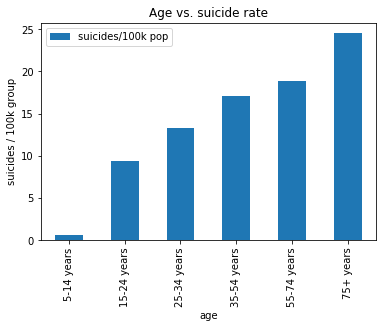

In [12]:
'''
    Plots total suicide rate over 100k population based on age groups
'''
age_data = raw_data.groupby('age').sum()
age_data = age_data.drop(columns=['year', 'HDI for year', 'gdp_per_capita ($)'])
age_data["suicides/100k pop"] = age_data.apply(lambda row: row.suicides_no * 1.0 / \
                                               row.population * 100000, axis=1)
age_data['age'] = age_data.index
age_data = age_data.reindex(['5-14 years', '15-24 years','25-34 years',\
                             '35-54 years',\
                             '55-74 years','75+ years'])
age_data.plot.bar(x='age', y='suicides/100k pop')
plt.title("Age vs. suicide rate")
plt.xlabel("age")
plt.ylabel("suicides / 100k group")

The graph above shows the relationship between age groups and suicide rate. It shows that a larger amount of older people commit suicide than younger people. The suicide rate increases steadily as age group increases.

Text(0, 0.5, 'suicides / 100k group')

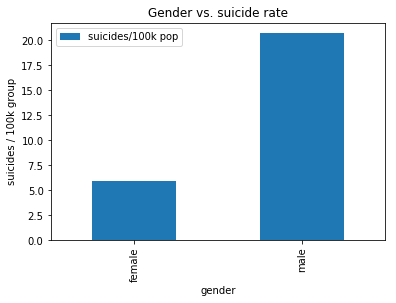

In [13]:
sex_data = raw_data.groupby('sex').sum()
sex_data = sex_data.drop(columns=['year', 'HDI for year', 'gdp_per_capita ($)'])
sex_data["suicides/100k pop"] = sex_data.apply(lambda row: row.suicides_no * 1.0 / \
                                               row.population * 100000, axis=1)
sex_data['sex'] = sex_data.index
sex_data.plot.bar(x='sex', y='suicides/100k pop')
plt.title("Gender vs. suicide rate")
plt.xlabel("gender")
plt.ylabel("suicides / 100k group")

The graph above shows the relationship between gender and suicide rate. According to the data collected this graph shows that a significantly larger portion of males commit suicide compared to females.

The three geospacial graphs below help provide a general sense on the distribution of GDP, HDI, and suicide rate between countries across the world. The graphs provide easy-to-interpret visual information on countries' relative index compared to neighbouring countries and countries across the world. The graphs below use the year 2012 because it is the year with the most complete data in recent years.

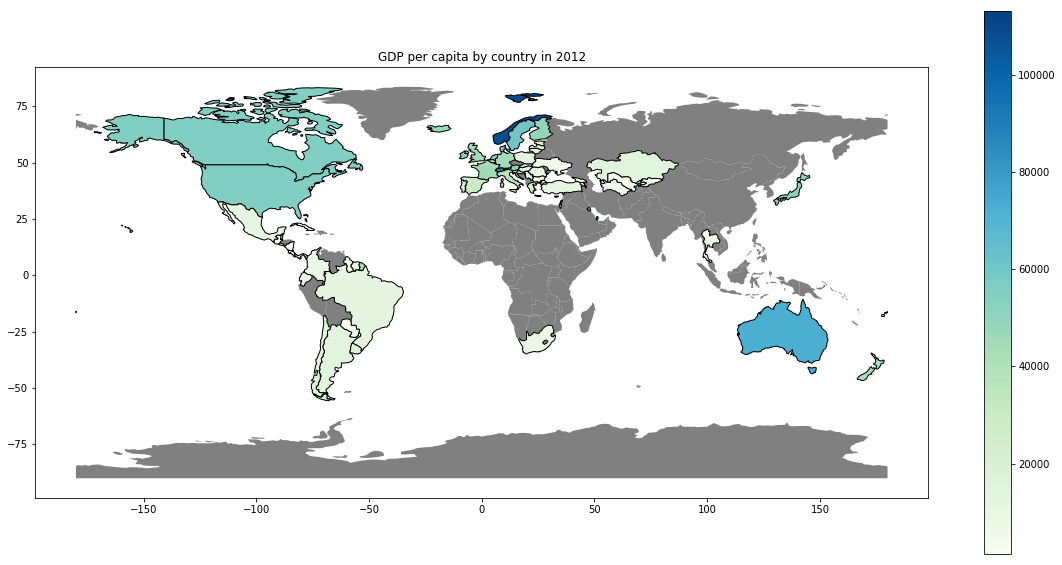

In [14]:
draw_gdp_per_year(2012)

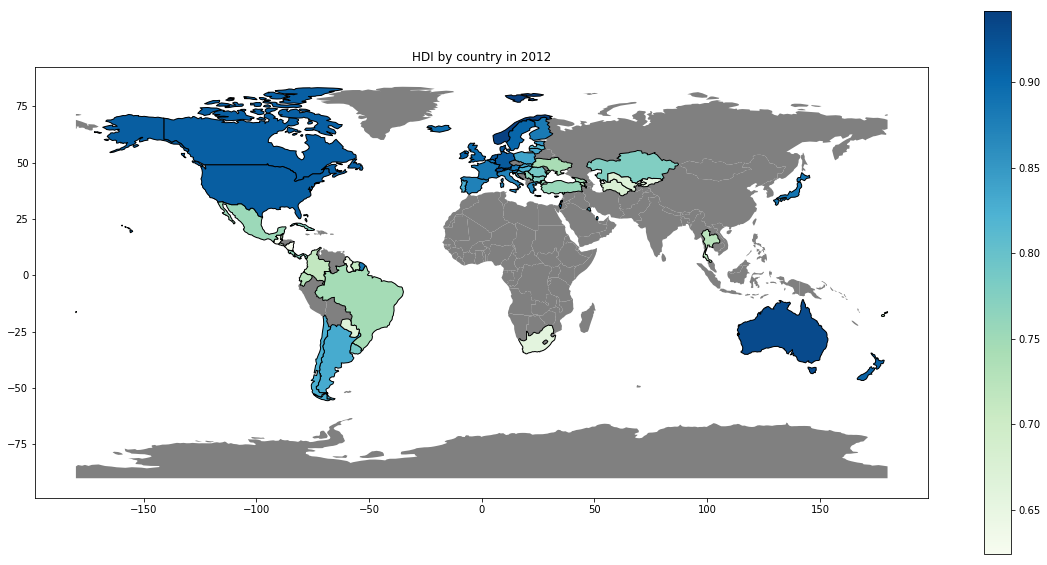

In [15]:
draw_hdi_per_year(2012)

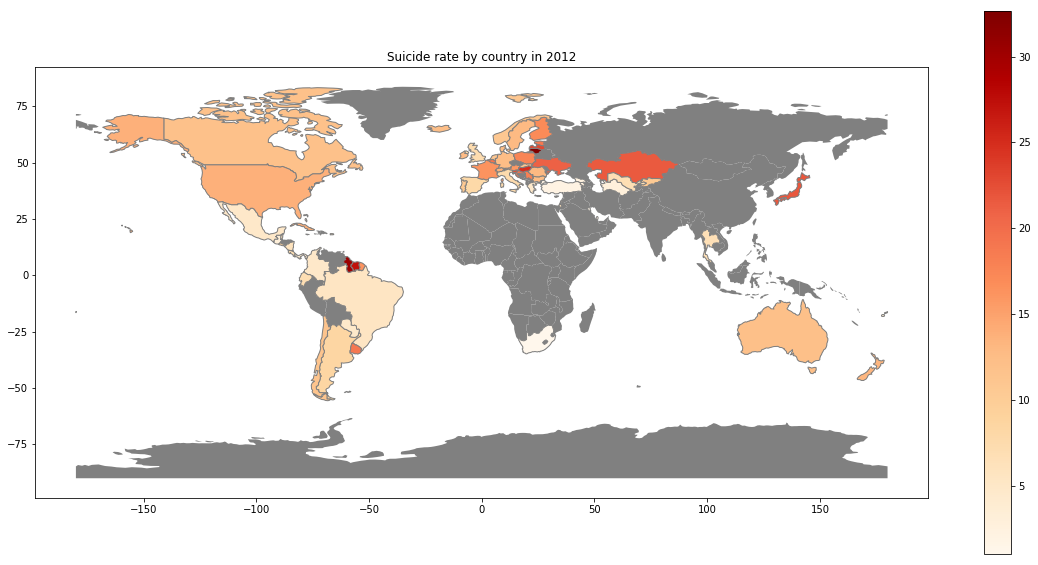

In [16]:
draw_geo_suicide_rate(2012)

In the 4 graphs below, we seek to compare the impact of  GDP and HDI on suicide rate for 2 different countries. We chose the United States because it is an example of a first world country with significant suicide rate and Kazakhastan because it is an example of a third world country with high suicide rate. We seek to understand how differently GDP and HDI can affect the people in countries with drastic differences.

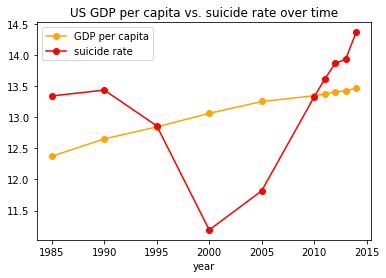

In [17]:
'''
    US line graph between GDP per capita and year vs. suicide rate
'''

xs = us_data.index.astype(int)
ys = np.log(us_data['gdp_per_capita'])
zs = (us_data['suicides_per_100k_pop'])
plt.title("US GDP per capita vs. suicide rate over time")
plt.xlabel("year")
plt.plot(xs,ys, marker='o',color = 'orange', label = 'GDP per capita')
plt.plot(xs,zs, marker='o',color = 'red',label = 'suicide rate')
plt.legend(loc='upper left')

The graph above shows the relationship between GDP per capita and suicide rate in the United States.

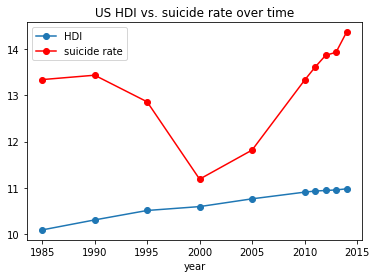

In [18]:
'''
    US line graph between HDI and year vs. suicide rate
'''

xs = us_data.index.astype(int)
ys = us_data['HDI_for_year']
zs = (us_data['suicides_per_100k_pop'])
plt.title("US HDI vs. suicide rate over time")
plt.xlabel("year")
plt.plot(xs,ys, marker='o', label = 'HDI')
plt.plot(xs,zs, marker='o',color = 'red',label = 'suicide rate')
plt.legend(loc='upper left')

The graph above shows the relationship between HDI and suicide rate in the United States.

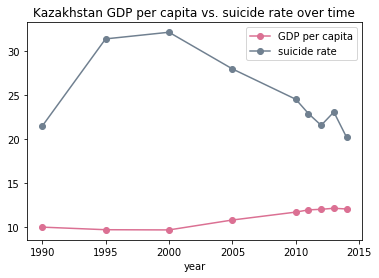

In [19]:
'''
    Kazakhstan line graph between GDP per capita and year vs. suicide rate
'''

xs = kha_data.index.astype(int)
ys = np.log(kha_data['gdp_per_capita'])
zs = (kha_data['suicides_per_100k_pop'])
plt.title("Kazakhstan GDP per capita vs. suicide rate over time")
plt.xlabel("year")
plt.plot(xs,ys, marker='o',color = 'palevioletred',label = 'GDP per capita')
plt.plot(xs,zs, marker='o',color = 'slategrey',label = 'suicide rate')
plt.legend(loc='upper right')

The graph above shows the relationship between GDP per capita and suicide rate in Kazakhastan.

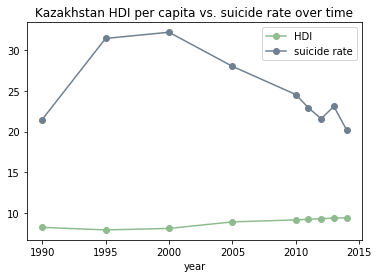

In [20]:
'''
    Kazakhstan line graph between HDI and year vs. suicide rate
'''

xs = kha_data.index.astype(int)
ys = kha_data['HDI_for_year']
zs = (kha_data['suicides_per_100k_pop'])
plt.title("Kazakhstan HDI per capita vs. suicide rate over time")
plt.xlabel("year")

plt.plot(xs,ys, marker='o',color = 'darkseagreen',label = 'HDI')
plt.plot(xs,zs, marker='o',color = 'slategrey',label = 'suicide rate')
plt.legend(loc='upper right')

The graph above shows the relationship between HDI and suicide rate in Kazakhstan.
The HDI and GDP shapes are very similar in this case.

Using the data collected, we want to use OLS regression method taught in class to see if there is a strong correlation between GDP and suicide rate. If so, then we want to predict suicde rate based on GDP per capita.

In [21]:
'''
    Linear Regression between suicide rate and gdp per capita
'''
outcome_gdp, predictor_gdp = patsy.dmatrices('suicides_per_100k_pop ~ gdp_per_capita'\
                                             , sum_data)
mod_gdp = sm.OLS(outcome_gdp, predictor_gdp)
res_gdp = mod_gdp.fit()
print(res_gdp.summary())

                              OLS Regression Results                             
Dep. Variable:     suicides_per_100k_pop   R-squared:                       0.002
Model:                               OLS   Adj. R-squared:                  0.000
Method:                    Least Squares   F-statistic:                     1.331
Date:                   Wed, 12 Jun 2019   Prob (F-statistic):              0.249
Time:                           17:01:28   Log-Likelihood:                -2411.2
No. Observations:                    684   AIC:                             4826.
Df Residuals:                        682   BIC:                             4836.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept     

Using information generated through the OLS regression and sum_data, we generate a graph with a line predicting possible suicide rate with increasing GDP.

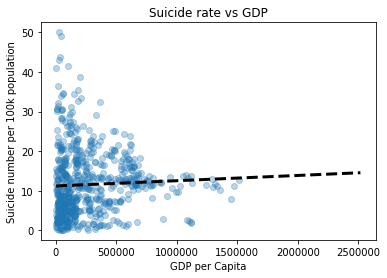

In [22]:
plt.scatter(sum_data['gdp_per_capita'], sum_data['suicides_per_100k_pop'], \
            alpha=0.3, label='Data')
plt.title('Suicide rate vs GDP')
plt.ylabel('Suicide number per 100k population')
plt.xlabel('GDP per Capita')
xs = np.arange(sum_data['gdp_per_capita'].min(), sum_data['gdp_per_capita'].max() \
               + 1000000)
ys = 1.33e-06 * xs + 11.1995
plt.plot(xs, ys, '--k', linewidth=3)

In the blocks below, we are doing the same OLS regression for HDI.

In [23]:
'''
    Linear Regression between suicide rate and gdp per capita
'''
outcome_hdi, predictor_hdi = patsy.dmatrices('suicides_per_100k_pop ~ HDI_for_year', \
                                             sum_data)
mod_hdi = sm.OLS(outcome_hdi, predictor_hdi)
res_hdi = mod_hdi.fit()
print(res_hdi.summary())

                              OLS Regression Results                             
Dep. Variable:     suicides_per_100k_pop   R-squared:                       0.046
Model:                               OLS   Adj. R-squared:                  0.044
Method:                    Least Squares   F-statistic:                     32.59
Date:                   Wed, 12 Jun 2019   Prob (F-statistic):           1.70e-08
Time:                           17:01:29   Log-Likelihood:                -2395.9
No. Observations:                    684   AIC:                             4796.
Df Residuals:                        682   BIC:                             4805.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2

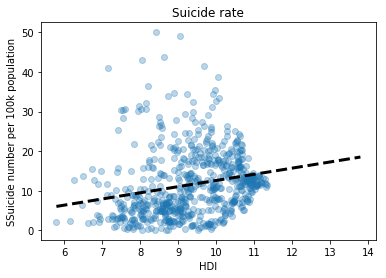

In [24]:
plt.scatter(sum_data['HDI_for_year'], sum_data['suicides_per_100k_pop'], \
            alpha=0.3, label='Data')
plt.title('Suicide rate')
plt.ylabel('SSuicide number per 100k population')
plt.xlabel('HDI')
xs = np.arange(sum_data['HDI_for_year'].min(), sum_data['HDI_for_year'].max() + 3)
ys = 1.5589 * xs - 2.9990
plt.plot(xs, ys, '--k', linewidth=3)

# Data Analysis & Results

Starting this project we aimed to find any correlation between suicide rates, GDP, and HDI to see if some factors influenced suicide rate more than others. So we approached our problem first through causal analysis to find out how much GDP or HDI impacted suicide rate. In terms of “how much”, we aren’t quantifying anything, but rather utilizing the graphs made to see if there are any correlations between the factors and suicide rate and to what extent that factor had on suicide rate. To better analyze the two major factors we decided to start off by comparing suicide/100k pop vs. age group and suicide/100k pop vs. sex with bar plots. We did this so that we can get a better idea of the population when it came to those that committed suicide. We found that the amount of suicides increased as the age group got older as well as the amount of suicides were much larger for males than females. Next we wanted to see overall, of the countries we had data on, what the suicide rate was like compared to GDP of the country for an arbitrary year. We have chosen 2012 as it has the most complete data collected across the world in recent years. Given the geomaps of the two datasets, there could be a correlation for GDP of a country impacting its suicide rate due to multiple countries having lowish GDPs and high suicide rates. However, this was only for 2012 so we decided to focus in on two countries from 1985 to 2016. Going off the U.S. GDP vs. suicide rate and HDI vs. suicide rate there doesn’t seem to be any correlation that would support our hypothesis since suicide rate decreased and spiked up, but the U.S. GDP and HDI remained at a somewhat consistent increase throughout the years. However, looking at Kazakhstan there seems to be a correlation for both GDP and HDI in regards to suicide rate. For GDP, whenever it decreased the suicide rate would increase and when it increased the suicide rate would decrease. However, there is a point in which the suicide rate does spike despite GDP increasing so there are definitely other factors in play. As for HDI, the same thing occurs, suicide rate increases as HDI decreases and it decreases when HDI increases. In regards to this, it raises the question of: If GDP and HDI do in fact affect suicide rate, why was it shown in the graphs for Kazakhstan compared to the graphs of the U.S.? We would have to do further analysis on other countries, but one possible reason is: the GDP and HDI of the U.S. reached a point where they stopped influencing suicide rate. For example, U.S. GDP was above 12 the entire time whereas Kazakhstan GDP was roughly below 12. Taking into account HDI as well, U.S. HDI was able to increase as time went on and slowly made it to 11 whereas  Kazakhstan HDI seemed to stay below 10 the entire time. So GDP and HDI might affect suicide rate until it reaches a certain threshold in which it stops affecting the suicide rate. However, to find if there really is a correlation, we decided to do regression lines for suicide rate vs. GDP and suicide rate vs. HDI.

Given that our hypothesis focuses on GDP, the data intepretation in this section will mostly focus on the result from the suicide rate and GDP intepretation. From the result summary we can tell first by looking at the Omnibus value that the normalcy of our data is not ideal and a multi-variant regression would probably work better here. We also have a relatively high skew value which from the graph we can tell the GDP skew heavily to the left. For the regression line of suicide rate vs. GDP there actually seems to be no correlation between the two, but one thing to note is that there tends to be a higher amount of suicides the lower the GDP is.

We also did data visualization on gender and ages. From those two graphs, we can observe that suicides rate increases significantly as age increases and the suicide rate of males is much higher than that of females. 

# Ethics & Privacy

With how sensitive a topic this is we understand the importance of privacy related to the individuals in the dataset. However, the dataset contains no identifying or private personal information of the individuals included. We believe we do not violate the three fundamental principles of research ethics; respect for persons, beneficence, and justice, based on our analyses and how we’re approaching our problem. Due to the very specifics of our research, the individuals are unable to be autonomous, however their anonymity is preserved when it comes to respect for person. As for beneficence we want do good and provide explanations to the problems that could be greatly affecting the global suicide rate. And for justice we hope to provide suggestions that can help benefit people that are contemplating suicide based off the analyses we come across. Finally, the data collected is from the United Nation Development Program, World Bank, and World Health Organization, sources that are public and follow ethical guidelines.

# Conclusion & Discussion

Through our the data cleaning and visualization process, we acknowledge that our data is relatively incomplete on many rows and catagories. We have then chosen to visualize and interpret on data that are more universal and generally applicable, such as age and gender. Some interesting conclusions we have made is that the suicide rate increases steadily as age increases with a spike after early teenage years. Also, we have found out that gender-wise, the males have a significantly higher suicide rate than females. Finally given our test hypothesis' 0.05 significance level, we reject the null hypothesis that suicide rate sigificantly correlates with GDP alone. In the end through our analysis and findings we also acknowledge that a single varaible linear regression does not seem to be the best option here. Due to the complicated nature that could lead to suicides, a multi-variance regression that systematically tests the significance of a combination of different causes could be better. Nevertheless, we think that we have discovered some interesting findings and have gained some more insight on this topic.